In [31]:
#Imports

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import lmfit as lm
import sys
sys.path.append('../python')
import dataPython as dp
import scipy.interpolate as inter
import NGC5533_functions as nf
from datetime import datetime
import scipy.integrate as si
#import noordermeer as noord
import time

In [35]:
#importing text files
#there's no need to import the radius for each component
#data:



data = dp.getXYdata_wXYerr('891_data')
r = np.asarray(data['xx'])
v_dat = np.asarray(data['yy'])
v_err1 = np.asarray(data['ey'])

#bulge
bulge = dp.getXYZdata('891_bulge.dat')
b = np.asarray(bulge['zz'])

#disk
thn_disk = dp.getXYZdata('891_thinDiskII')
thn_d= np.asarray(thn_disk['zz'])
thk_disk = dp.getXYZdata('891_thickDisk2')
thk_d = np.asarray(thk_disk['zz'])
#d = np.add(thn_d,thk_d)

#bulge
thn_gas = dp.getXYZdata('891_thinGas.dat')
thn_gas = np.asarray(thn_gas['zz'])
thk_gas = dp.getXYZdata('891_thickGas.dat')
thk_g = np.asarray(thk_gas['zz'])
g = np.add(thn_g,thk_g)


print(len(r))
print(len(thn_d))
print(len(g))
print(len(b))
help(len)

FileNotFoundError: [Errno 2] No such file or directory: '../NGC891/891_data'

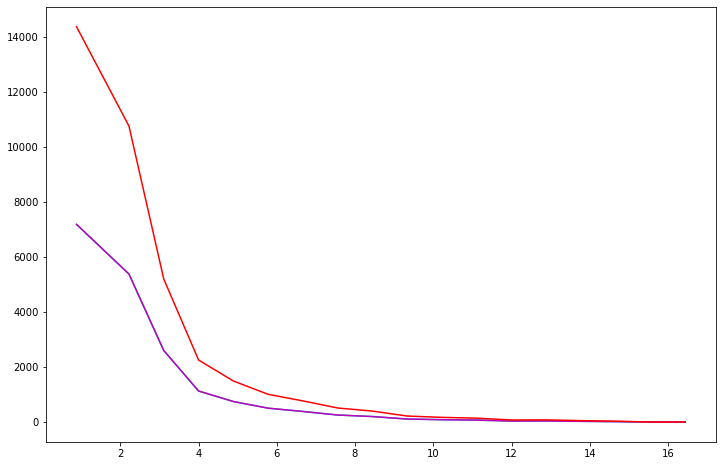

In [30]:
thnDiskLum = np.asarray(thn_disk['yy'])
thkDiskLum = np.asarray(thk_disk['yy'])
totalDiskLum = np.add(thnDiskLum,thkDiskLum)

plt.figure(figsize=(12,8))
plt.plot(r,thnDiskLum,'c')
plt.plot(r,thkDiskLum, 'm')
plt.plot(r,totalDiskLum, 'r')

ValueError: x and y must have same first dimension, but have shapes (18,) and (19,)

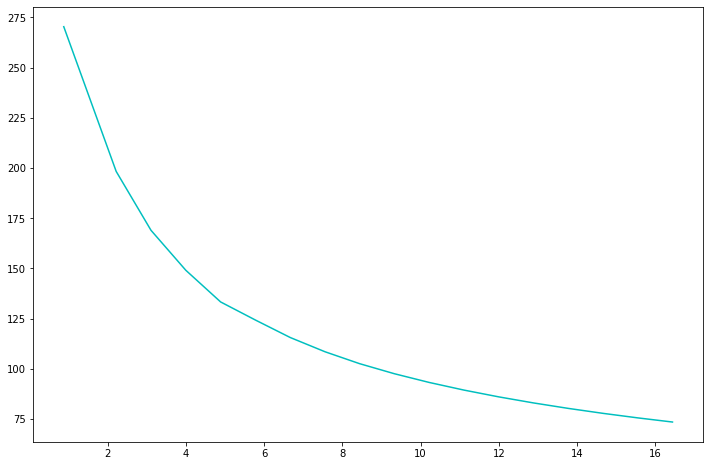

In [25]:
def t(r,B,D,rc,tho00,G):
    t_ =  np.sqrt((D*d)**2+(B*b)**2+(nf.h_v(r,rc,rho00))**2+(G*g)**2) 
    return(t_)
#In 7814 code this^ is G*b

plt.figure(figsize=(12,8))
plt.plot(r,thn_g,'c',label = 'gas unfitted')
plt.plot(r,thn_d,'m',label = 'disk unfitted')
plt.plot(r,b,'r',label = 'bulge unfitted')

rc=2.5 #default value
rho00=1e8 #default value
plt.plot(r,nf.h_v(r,rc,rho00),'g',label='halo unfitted')
plt.plot(r,t(r,1,1,rc,rho00,1),'k',label='total unfitted')
plt.errorbar(r,v_dat,yerr=v_err1,fmt='bo',label='Data')

plt.xlabel('r (kpc)')
plt.ylabel('v (km/s)')
plt.legend()
plt.show()